In [2]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("MNIST_data.", one_hot = True)

Extracting MNIST_data./train-images-idx3-ubyte.gz
Extracting MNIST_data./train-labels-idx1-ubyte.gz
Extracting MNIST_data./t10k-images-idx3-ubyte.gz
Extracting MNIST_data./t10k-labels-idx1-ubyte.gz


In [7]:
nb_class = 10

X = tf.placeholder('float32', [None, 784])
Y = tf.placeholder('float32', [None, nb_class])

W = tf.Variable(tf.random_normal([784, nb_class]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_class]), name = 'bias')

In [9]:
hypo = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypo), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [10]:
pred = tf.arg_max(hypo, 1)
is_correct = tf.equal(pred, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [18]:
trainning_epochs = 15 #전체 데이터 셋을 한번 학습시키는 단위 (batch 전체 다 돌았을 때) 10000/100 일때 100번 돌아야 1epcho
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # epoch 부분
    for epoch in range(trainning_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # batch 부분
        for ind in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c/total_batch
        
        # 
        print('# of Epoch = ', '{:04d}'.format(epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
    
    
    # Get one and predict
    r = rnd.randint(0, mnist.test.num_examples - 1)
    
    # select label 
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypo, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# of Epoch =  0001 cost =  2.839372897
# of Epoch =  0002 cost =  1.080333975
# of Epoch =  0003 cost =  0.871700290
# of Epoch =  0004 cost =  0.767439151
# of Epoch =  0005 cost =  0.700338649
# of Epoch =  0006 cost =  0.652345834
# of Epoch =  0007 cost =  0.615873842
# of Epoch =  0008 cost =  0.586534727
# of Epoch =  0009 cost =  0.562405129
# of Epoch =  0010 cost =  0.541694382
# of Epoch =  0011 cost =  0.524246521
# of Epoch =  0012 cost =  0.508709912
# of Epoch =  0013 cost =  0.495176356
# of Epoch =  0014 cost =  0.482800672
# of Epoch =  0015 cost =  0.472134947
Learning finished
Accuracy:  0.8861
Label:  [3]
Prediction:  [3]


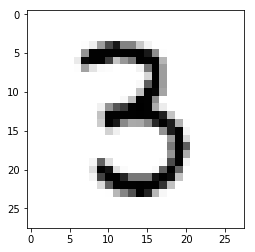

In [19]:
# don't know why this makes Travis Build error.
plt.imshow(
mnist.test.images[r:r + 1].reshape(28, 28),
    cmap='Greys',
    interpolation='nearest')
plt.show()

In [15]:
import matplotlib.pyplot as plt
import random as rnd

In [ ]:
r = rnd.randint(0,mnist.test)